KNN

Root Mean Squared Error (RMSE): 0.045473644377082


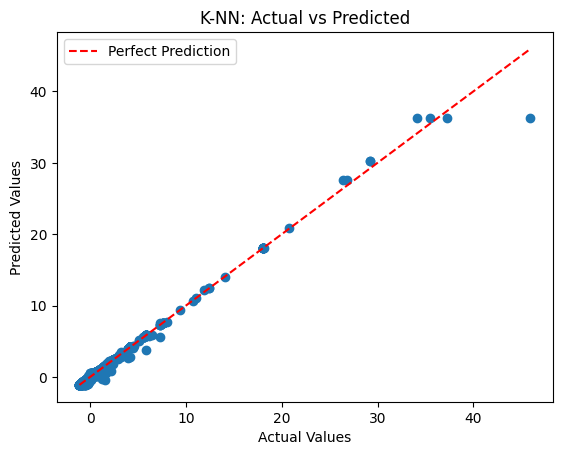

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor  # Use KNeighborsClassifier for classification tasks
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load the data (Replace with your actual data file path)
data = pd.read_csv('/content/sample_data/output1.csv')

# Step 2: Data Preprocessing

# 2.1: Handle missing data (only for numerical columns)
numerical_cols = data.select_dtypes(include=[np.number]).columns  # Select only numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())  # Fill missing values with the mean of each numerical column

# 2.2: Convert Timestamp to meaningful features
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

# Drop the original Timestamp column after extracting features
data.drop(columns=['Timestamp'], inplace=True)

# 2.3: Encode categorical features (Source IP, Destination IP, Protocol)
# Using LabelEncoder for simplicity, but you can use OneHotEncoder as well
label_encoder = LabelEncoder()
data['Source_IP'] = label_encoder.fit_transform(data['Source IP'])
data['Destination_IP'] = label_encoder.fit_transform(data['Destination IP'])
data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

# 2.4: Normalize numerical features (Length, Hour, DayOfWeek, Month)
scaler = StandardScaler()
data[['Length', 'Hour', 'DayOfWeek', 'Month']] = scaler.fit_transform(data[['Length', 'Hour', 'DayOfWeek', 'Month']])

# Step 3: Prepare the features (X) and target (y)
X = data[['Source_IP', 'Destination_IP', 'Protocol', 'Length', 'Hour', 'DayOfWeek', 'Month']]
y = data['Length']  # If you want to predict packet length, adjust this column

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the K-NN model
knn = KNeighborsRegressor(n_neighbors=5)  # You can experiment with different values of n_neighbors
knn.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Optional: Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-NN: Actual vs Predicted')

# Add the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")

# Show the legend
plt.legend()

plt.show()

Decision Tree

Root Mean Squared Error (RMSE): 0.011790858731537898


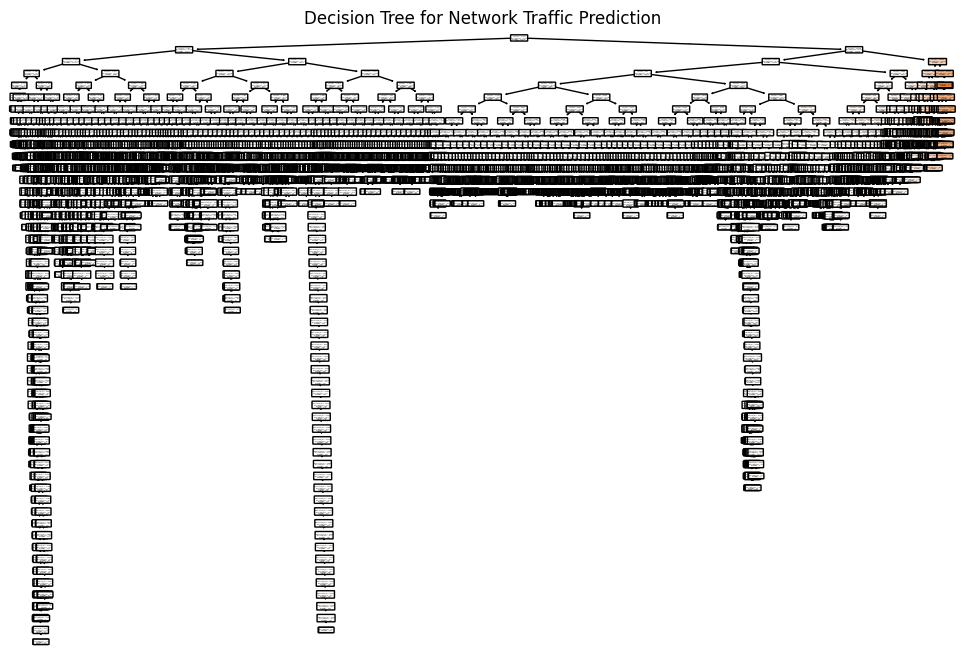

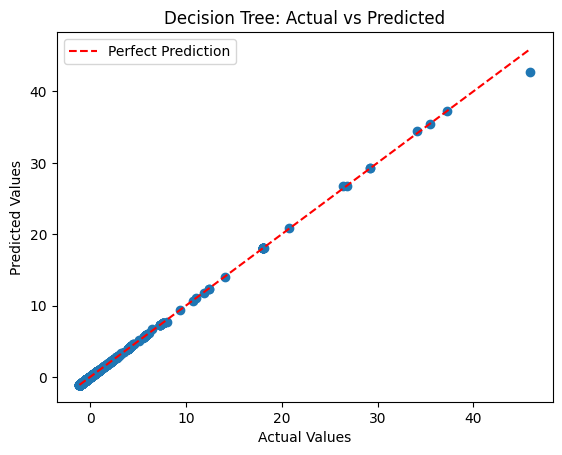

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load the data (Replace with your actual data file path)
data = pd.read_csv('/content/sample_data/output1.csv')

# Step 2: Data Preprocessing

# 2.1: Handle missing data (only for numerical columns)
numerical_cols = data.select_dtypes(include=[np.number]).columns  # Select only numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())  # Fill missing values with the mean of each numerical column

# 2.2: Convert Timestamp to meaningful features
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

# Drop the original Timestamp column after extracting features
data.drop(columns=['Timestamp'], inplace=True)

# 2.3: Encode categorical features (Source IP, Destination IP, Protocol)
# Using LabelEncoder for simplicity, but you can use OneHotEncoder as well
label_encoder = LabelEncoder()
data['Source_IP'] = label_encoder.fit_transform(data['Source IP'])
data['Destination_IP'] = label_encoder.fit_transform(data['Destination IP'])
data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

# 2.4: Normalize numerical features (Length, Hour, DayOfWeek, Month)
scaler = StandardScaler()
data[['Length', 'Hour', 'DayOfWeek', 'Month']] = scaler.fit_transform(data[['Length', 'Hour', 'DayOfWeek', 'Month']])

# Step 3: Prepare the features (X) and target (y)
X = data[['Source_IP', 'Destination_IP', 'Protocol', 'Length', 'Hour', 'DayOfWeek', 'Month']]
y = data['Length']  # If you want to predict packet length, adjust this column

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = dt_model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Step 8: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, class_names=["Length"])
plt.title("Decision Tree for Network Traffic Prediction")
plt.show()

# Optional: Plot predicted vs actual values (same as K-NN example)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted')

# Add the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")

# Show the legend
plt.legend()

plt.show()

K-Means

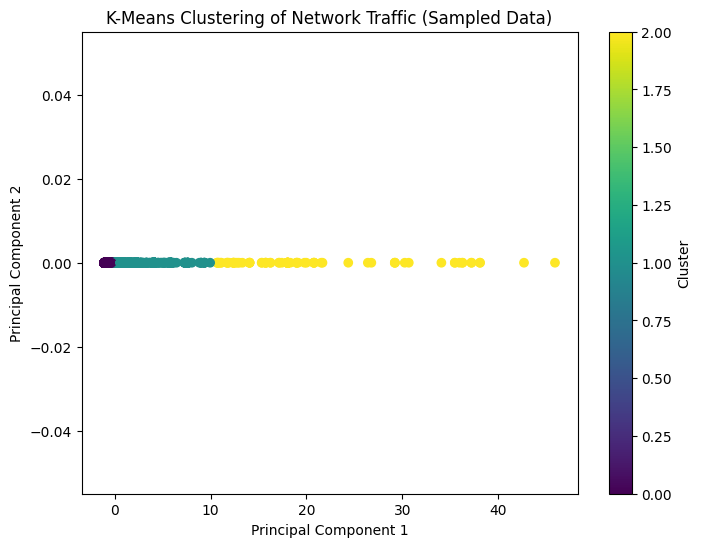

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the data (Replace with your actual data file path)
data = pd.read_csv('/content/sample_data/output1.csv')

# Sample 10% of the data
data_sampled = data.sample(frac=0.5, random_state=42)

# Step 2: Data Preprocessing (same as before)
numerical_cols = data_sampled.select_dtypes(include=[np.number]).columns  # Select only numerical columns
data_sampled[numerical_cols] = data_sampled[numerical_cols].fillna(data_sampled[numerical_cols].mean())  # Fill missing values

# Convert Timestamp to meaningful features
data_sampled['Timestamp'] = pd.to_datetime(data_sampled['Timestamp'])
data_sampled['Hour'] = data_sampled['Timestamp'].dt.hour
data_sampled['DayOfWeek'] = data_sampled['Timestamp'].dt.dayofweek
data_sampled['Month'] = data_sampled['Timestamp'].dt.month
data_sampled.drop(columns=['Timestamp'], inplace=True)

# Encode categorical features (Source IP, Destination IP, Protocol)
label_encoder = LabelEncoder()
data_sampled['Source_IP'] = label_encoder.fit_transform(data_sampled['Source IP'])
data_sampled['Destination_IP'] = label_encoder.fit_transform(data_sampled['Destination IP'])
data_sampled['Protocol'] = label_encoder.fit_transform(data_sampled['Protocol'])

# Normalize numerical features
scaler = StandardScaler()
data_sampled[['Length', 'Hour', 'DayOfWeek', 'Month']] = scaler.fit_transform(data_sampled[['Length', 'Hour', 'DayOfWeek', 'Month']])

# Select a subset of features for clustering
X = data_sampled[['Length', 'Hour', 'DayOfWeek']]  # Fewer features

# Apply PCA for dimensionality reduction (if needed)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
data_sampled['Cluster'] = kmeans.fit_predict(X_reduced)

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=data_sampled['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Network Traffic (Sampled Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Linear Regression

Mean Squared Error (MSE): 0.9755694705461153
Root Mean Squared Error (RMSE): 0.9877092034329311
R-squared (R2) Score: 0.0013253900128600282


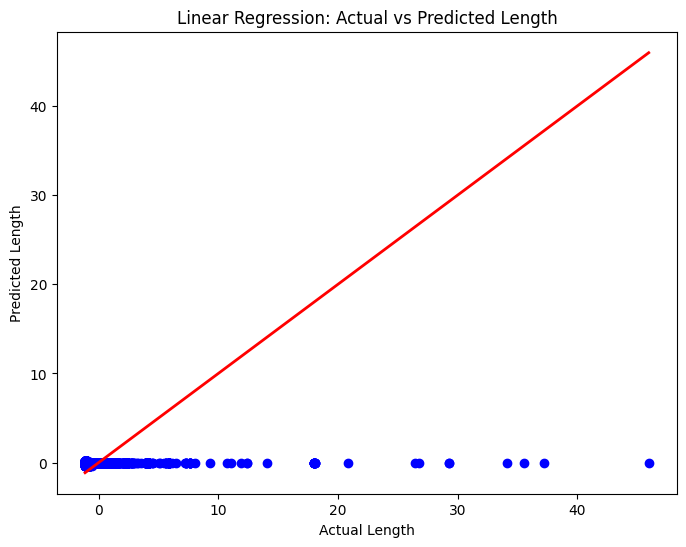

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the data (Replace with your actual data file path)
data = pd.read_csv('/content/sample_data/output1.csv')

# Step 2: Data Preprocessing

# 2.1: Handle missing data (e.g., fill missing values with the mean or drop rows)
numerical_cols = data.select_dtypes(include=[np.number]).columns  # Select only numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())  # Fill missing values with the mean

# 2.2: Convert Timestamp to meaningful features
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

# Drop the original Timestamp column after extracting features
data.drop(columns=['Timestamp'], inplace=True)

# 2.3: Encode categorical features (Source IP, Destination IP, Protocol)
label_encoder = LabelEncoder()
data['Source_IP'] = label_encoder.fit_transform(data['Source IP'])
data['Destination_IP'] = label_encoder.fit_transform(data['Destination IP'])
data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

# 2.4: Normalize numerical features (Length, Hour, DayOfWeek, Month)
scaler = StandardScaler()
data[['Length', 'Hour', 'DayOfWeek', 'Month']] = scaler.fit_transform(data[['Length', 'Hour', 'DayOfWeek', 'Month']])

# Step 3: Prepare the features (X) and target (y)
# Let's predict the 'Length' (Packet Length)
# X = data[['Source_IP', 'Destination_IP', 'Protocol', 'Hour', 'DayOfWeek', 'Month']]
X = data[['Protocol']]
y = data['Length']  # The target variable we want to predict

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

# Step 8: Plotting the Predictions vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of equality
plt.title('Linear Regression: Actual vs Predicted Length')
plt.xlabel('Actual Length')
plt.ylabel('Predicted Length')
plt.show()

Bayasian Learning

Mean Squared Error (MSE): 0.9500991749831336
Root Mean Squared Error (RMSE): 0.974730308846059
R-squared (R2) Score: 0.02739891758376556
Time taken for execution: 0.27176976203918457 seconds


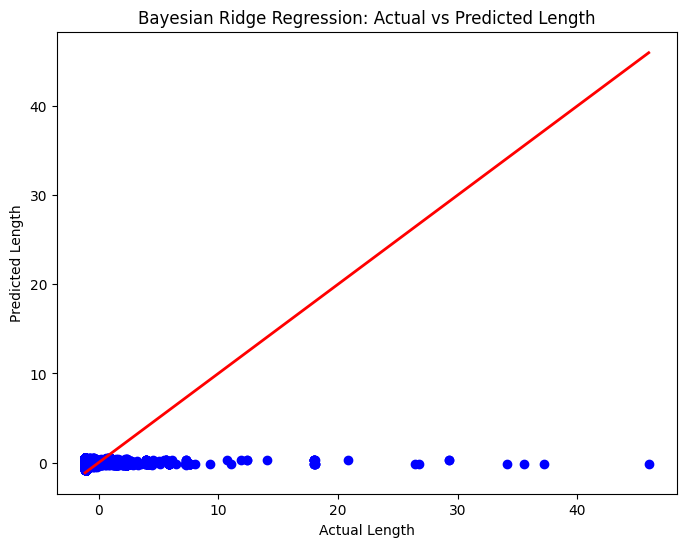

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import time

# Step 1: Load the data (Replace with your actual data file path)
data = pd.read_csv('/content/sample_data/output1.csv')

# Step 2: Data Preprocessing

# 2.1: Handle missing data (e.g., fill missing values with the mean or drop rows)
numerical_cols = data.select_dtypes(include=[np.number]).columns  # Select only numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())  # Fill missing values with the mean

# 2.2: Convert Timestamp to meaningful features
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

# Drop the original Timestamp column after extracting features
data.drop(columns=['Timestamp'], inplace=True)

# 2.3: Encode categorical features (Source IP, Destination IP, Protocol)
label_encoder = LabelEncoder()
data['Source_IP'] = label_encoder.fit_transform(data['Source IP'])
data['Destination_IP'] = label_encoder.fit_transform(data['Destination IP'])
data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

# 2.4: Normalize numerical features (Length, Hour, DayOfWeek, Month)
scaler = StandardScaler()
data[['Length', 'Hour', 'DayOfWeek', 'Month']] = scaler.fit_transform(data[['Length', 'Hour', 'DayOfWeek', 'Month']])

# Step 3: Prepare the features (X) and target (y)
# Let's predict the 'Length' (Packet Length)
X = data[['Source_IP', 'Destination_IP', 'Protocol', 'Hour', 'DayOfWeek', 'Month']]
y = data['Length']  # The target variable we want to predict

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Bayesian Ridge Regression Model
start_time = time.time()  # Start time to measure execution time
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = bayesian_model.predict(X_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

end_time = time.time()  # End time to measure execution time
execution_time = end_time - start_time  # Time taken to train and evaluate the model

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Time taken for execution: {execution_time} seconds")

# Step 8: Plotting the Predictions vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of equality
plt.title('Bayesian Ridge Regression: Actual vs Predicted Length')
plt.xlabel('Actual Length')
plt.ylabel('Predicted Length')
plt.show()

Neural Network

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1971/1971 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Mean Squared Error (MSE): 0.5174497572002498
Root Mean Squared Error (RMSE): 0.7193398064894294
R-squared (R2) Score: 0.4650352509567822
Time taken for execution: 838.1285948753357 seconds


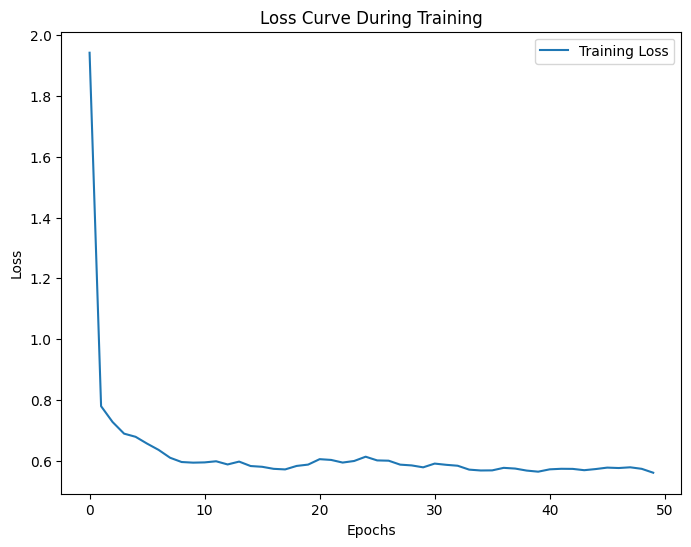

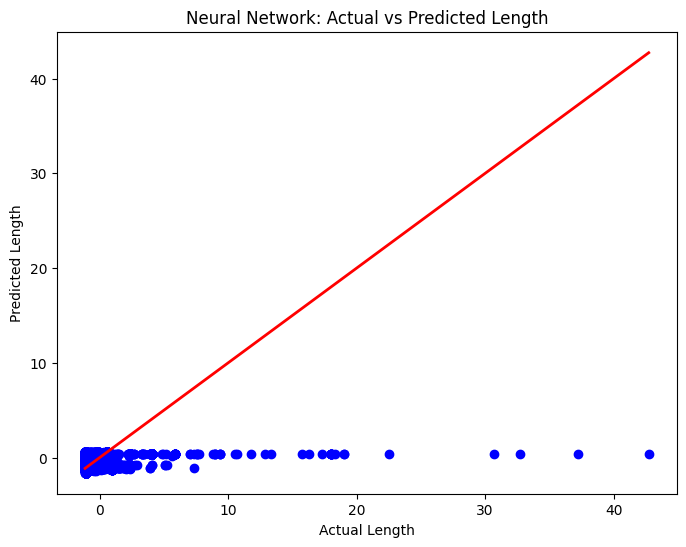

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import time

# Step 1: Load the data (replace with your actual data file path)
data = pd.read_csv('/content/sample_data/output1.csv')

# Step 2: Data Preprocessing

# 2.1: Handle missing data (fill missing values with the mean)
numerical_cols = data.select_dtypes(include=[np.number]).columns  # Select only numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())  # Fill missing values with the mean

# 2.2: Convert Timestamp to meaningful features
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

# Drop the original Timestamp column after extracting features
data.drop(columns=['Timestamp'], inplace=True)

# 2.3: Encode categorical features (Source IP, Destination IP, Protocol)
label_encoder = LabelEncoder()
data['Source_IP'] = label_encoder.fit_transform(data['Source IP'])
data['Destination_IP'] = label_encoder.fit_transform(data['Destination IP'])
data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

# 2.4: Normalize numerical features (Length, Hour, DayOfWeek, Month)
scaler = StandardScaler()
data[['Length', 'Hour', 'DayOfWeek', 'Month']] = scaler.fit_transform(data[['Length', 'Hour', 'DayOfWeek', 'Month']])

# Step 3: Prepare the features (X) and target (y)
# Let's predict the 'Length' (Packet Length)
X = data[['Source_IP', 'Destination_IP', 'Protocol', 'Hour', 'DayOfWeek', 'Month']]
y = data['Length']  # The target variable we want to predict

# Step 4: Reduce the data size to speed up testing (take 20% of the data)
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train-Test Split for the sampled data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Step 6: Build a simple Neural Network Model in TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (single continuous value)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the model
start_time = time.time()  # Start time to measure execution time
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Step 8: Evaluate the model on the test set
y_pred = model.predict(X_test)

# Step 9: Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

end_time = time.time()  # End time to measure execution time
execution_time = end_time - start_time  # Time taken to train and evaluate the model

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Time taken for execution: {execution_time} seconds")

# Step 10: Plotting the Loss Curve during Training (Epochs vs Loss)
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Curve During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 11: Plotting the Predictions vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of equality
plt.title('Neural Network: Actual vs Predicted Length')
plt.xlabel('Actual Length')
plt.ylabel('Predicted Length')
plt.show()